In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [31]:
import os
ORIGINAL_PATH= os.path.join('.','data')
DATA_PATH = os.path.join(ORIGINAL_PATH, 'output.csv')

In [32]:
df = pd.read_csv(DATA_PATH)

In [33]:
y = df['Label']
X = df.drop(columns=['Label'])


In [34]:
print(X['Category'].unique())
print(X['Category'][0],X['Category'][1],X['Category'][997],X['Category'][999] )


['capture' 'utilization' 'T&S' 'Full Chain']
capture utilization T&S Full Chain


In [35]:
X['Budget'] = X['Budget'].str.replace('$', '').astype(float)
label_encoder = LabelEncoder()
X['Category'] = label_encoder.fit_transform(X['Category'])
columns_to_drop = ['Unnamed: 0', 'Project', 'Country','Start','End','profit (%)','Emissions decrease']
X = X.drop(columns=columns_to_drop)

In [36]:
print(X['Category'].unique())
print(X['Category'][0],X['Category'][1],X['Category'][997],X['Category'][999] )

[2 3 1 0]
2 3 1 0


In [30]:
print(X)
#capture =0 // utilisation = 3 // 

          Budget  FindingSource (%)  Category  TRL Start  TRL End
0    36399069.63               77.0         2          2        3
1    48806994.79               84.0         3          7        5
2    11548939.83               82.6         3          3        4
3    17512435.77               71.1         3          6        3
4    18929345.53               66.8         2          4        7
..           ...                ...       ...        ...      ...
995  51230399.26               51.7         0          7        9
996  23925572.49               50.3         1          3        7
997  87475622.39               93.4         1          7        6
998   1259344.27               63.9         3          6        5
999  47882510.76               61.8         0          5        4

[1000 rows x 5 columns]


In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print(X_val)

          Budget  FindingSource (%)  Category  TRL Start  TRL End
521  94940363.46               54.7         1          3        7
737  96782209.35               93.3         2          8        2
740  38230093.42               83.7         1          4        9
660  85805274.31               57.2         2          7        6
411  67450054.57               62.9         1          4        3
..           ...                ...       ...        ...      ...
408  53602498.06               52.8         3          5        7
332  64768407.65               87.5         0          2        3
208  36933690.78               54.7         0          6        2
613  46868829.95               70.6         0          1        4
78   17915576.05               63.0         3          9        6

[200 rows x 5 columns]


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [38]:
print(X_val)

[[ 1.57216039 -1.41357214 -0.41281708 -0.82357036  0.73250785]
 [ 1.63689167  1.2541156   0.48951533  1.09729345 -1.44757503]
 [-0.4209099   0.59064922 -0.41281708 -0.4393976   1.604541  ]
 [ 1.25110964 -1.24079444  0.48951533  0.71312069  0.29649127]
 [ 0.60601937 -0.84686127 -0.41281708 -0.4393976  -1.01155846]
 [-0.76159298 -1.4619499   1.39184775  0.32894793  1.16852442]
 [-0.01063998  0.45933816 -1.31514949 -1.20774312  0.29649127]
 [ 0.0323706  -0.30088373  0.48951533  1.09729345 -1.01155846]
 [-0.76358999  0.4938937  -0.41281708  0.32894793 -1.01155846]
 [-1.45786648 -1.30299441  0.48951533  0.71312069 -0.57554188]
 [-1.39187556  0.21744938  1.39184775 -0.82357036  0.29649127]
 [ 0.27700583  1.57202657 -1.31514949 -0.4393976   1.16852442]
 [-1.61852076  0.79798246  1.39184775 -0.82357036 -0.1395253 ]
 [ 1.32891569  0.68049362  0.48951533 -0.4393976  -1.01155846]
 [ 0.10052047 -0.73628354 -0.41281708  1.09729345 -0.1395253 ]
 [ 1.0403465   0.58373811 -0.41281708 -0.4393976  -1.44

In [10]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [56]:

y_val_pred = svm_model.predict(X_val)


c:\Users\Eurl Traxy\Desktop\MLAPI\speML\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [58]:
print(y_val_pred , y_val)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 521    1
737    0
740    0
660    0
411    0
      ..
408    0
332    1
208    1
613    1
78     0
Name: Label, Length: 200, dtype: int64


In [59]:

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (SVM): {val_accuracy:.2f}")

Validation Accuracy (SVM): 0.65


In [60]:
df['Budget'] = df['Budget'].str.replace('$', '').astype(float)
df['FindingSource (%)'] = df['FindingSource (%)'].astype(float)
df['TRL Start'] = df['TRL Start'].astype(int)
df['TRL End'] = df['TRL End'].astype(int)

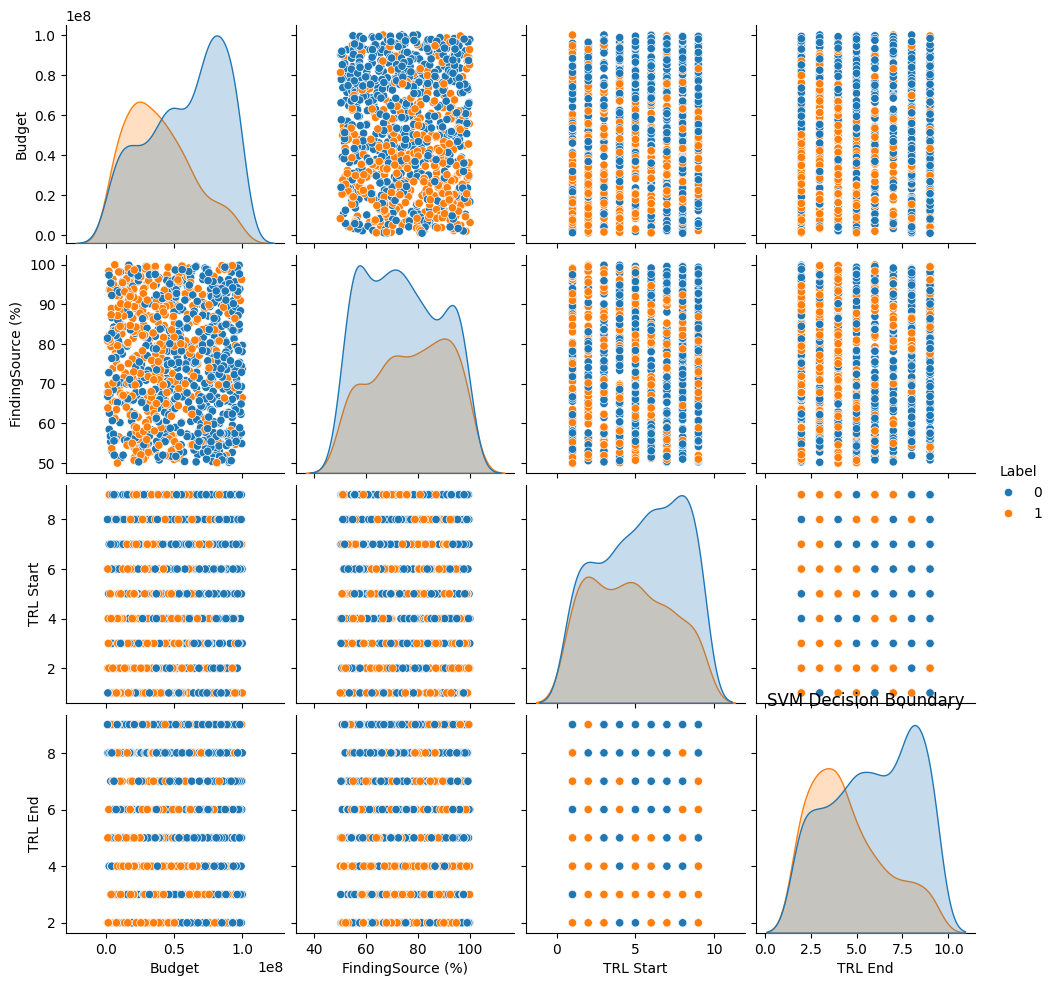

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df, hue='Label', vars=[ 'Budget' , 'FindingSource (%)','TRL Start','TRL End'])
plt.title("SVM Decision Boundary")
plt.show()

In [54]:
new_df = pd.DataFrame([[654657.65 , 70.5 ,3,5,8]])
x2 = new_df.to_numpy()
print(x2)
print(svm_model.predict([[654657.65 , 70.5 ,3,5,8]]))

[[6.5465765e+05 7.0500000e+01 3.0000000e+00 5.0000000e+00 8.0000000e+00]]
[0]


In [55]:
import pickle

with open("model.pkl" , 'wb') as f :
    pickle.dump(svm_model , f)